In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
mat = loadmat('../references/AAL90/C90.mat')
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Feb  1 19:32:40 2021',
 '__version__': '1.0',
 '__globals__': [],
 'C': array([[ 0.00000000e+00,  5.97354597e-01,  2.56943725e-01, ...,
         -6.37273532e-02,  2.54821095e-01,  2.14137415e-01],
        [ 5.97354597e-01,  0.00000000e+00, -6.89135462e-02, ...,
         -8.15449472e-02,  2.50984426e-05,  8.99084597e-02],
        [ 2.56943725e-01, -6.89135462e-02,  0.00000000e+00, ...,
         -5.40530047e-02,  2.70374393e-01,  3.32403756e-01],
        ...,
        [-6.37273532e-02, -8.15449472e-02, -5.40530047e-02, ...,
          0.00000000e+00,  2.25130143e-01,  2.82703524e-01],
        [ 2.54821095e-01,  2.50984426e-05,  2.70374393e-01, ...,
          2.25130143e-01,  0.00000000e+00,  6.43683833e-01],
        [ 2.14137415e-01,  8.99084597e-02,  3.32403756e-01, ...,
          2.82703524e-01,  6.43683833e-01,  0.00000000e+00]])}

In [17]:
C = mat['C']
C.shape

(90, 90)

In [18]:
C

array([[ 0.00000000e+00,  5.97354597e-01,  2.56943725e-01, ...,
        -6.37273532e-02,  2.54821095e-01,  2.14137415e-01],
       [ 5.97354597e-01,  0.00000000e+00, -6.89135462e-02, ...,
        -8.15449472e-02,  2.50984426e-05,  8.99084597e-02],
       [ 2.56943725e-01, -6.89135462e-02,  0.00000000e+00, ...,
        -5.40530047e-02,  2.70374393e-01,  3.32403756e-01],
       ...,
       [-6.37273532e-02, -8.15449472e-02, -5.40530047e-02, ...,
         0.00000000e+00,  2.25130143e-01,  2.82703524e-01],
       [ 2.54821095e-01,  2.50984426e-05,  2.70374393e-01, ...,
         2.25130143e-01,  0.00000000e+00,  6.43683833e-01],
       [ 2.14137415e-01,  8.99084597e-02,  3.32403756e-01, ...,
         2.82703524e-01,  6.43683833e-01,  0.00000000e+00]])

In [19]:
C_abs = np.abs(C)
C_abs

array([[0.00000000e+00, 5.97354597e-01, 2.56943725e-01, ...,
        6.37273532e-02, 2.54821095e-01, 2.14137415e-01],
       [5.97354597e-01, 0.00000000e+00, 6.89135462e-02, ...,
        8.15449472e-02, 2.50984426e-05, 8.99084597e-02],
       [2.56943725e-01, 6.89135462e-02, 0.00000000e+00, ...,
        5.40530047e-02, 2.70374393e-01, 3.32403756e-01],
       ...,
       [6.37273532e-02, 8.15449472e-02, 5.40530047e-02, ...,
        0.00000000e+00, 2.25130143e-01, 2.82703524e-01],
       [2.54821095e-01, 2.50984426e-05, 2.70374393e-01, ...,
        2.25130143e-01, 0.00000000e+00, 6.43683833e-01],
       [2.14137415e-01, 8.99084597e-02, 3.32403756e-01, ...,
        2.82703524e-01, 6.43683833e-01, 0.00000000e+00]])

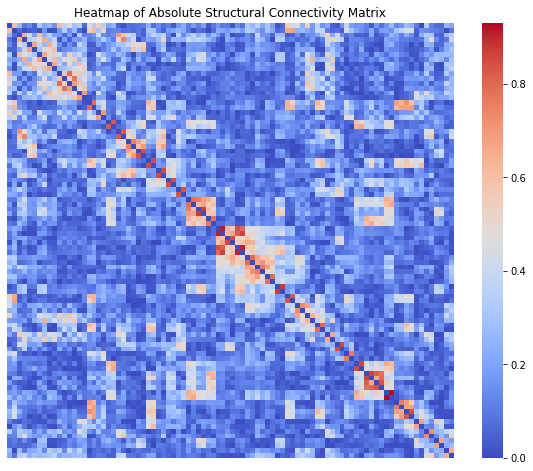

In [20]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(C_abs, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Absolute Structural Connectivity Matrix')
plt.show()

In [153]:
import numpy as np

def solve_ode_network(num_steps, dt, a, omega, beta, C, G=0.05):
    # Initialize the arrays to store the x, y values for all neurons
    x_values = np.zeros((num_steps, 90))
    y_values = np.zeros((num_steps, 90))
    z_values = np.zeros((num_steps, 90))
    
    # Initialize x and y vectors with zeros
    x = np.ones(90)*0.5
    y = np.ones(90)*0.5

    for step in range(num_steps):
        # Generate a single random noise term for each neuron
        noise = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=90)

        # Calculate the dxdt and dydt using the equations provided
        dxdt = (a - x**2 - y**2) * x - omega * y + G * np.dot(C, (x - x[:, None])).diagonal() + beta * noise
        dydt = (a - x**2 - y**2) * y + omega * x + G * np.dot(C, (y - y[:, None])).diagonal() + beta * noise
        # print(dxdt.shape)
        
        # Update the x and y values
        x += dxdt * dt
        y += dydt * dt
        z = np.sqrt(x**2 + y**2)
        
        # Store the values
        x_values[step, :] = x
        y_values[step, :] = y
        z_values[step, :] = z
    
    return x_values, y_values, z_values

# Example usage:
num_steps = 1000  # for example
dt = 0.01  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron
omega = 2 * np.pi * 12  # angular frequencies for each neuron
beta = 1000  # noise level

# Solve the ODEs
x_values, y_values, z_values = solve_ode_network(num_steps, dt, a, omega, beta, C)

In [48]:
j = np.array([0, 20, 40, 80])

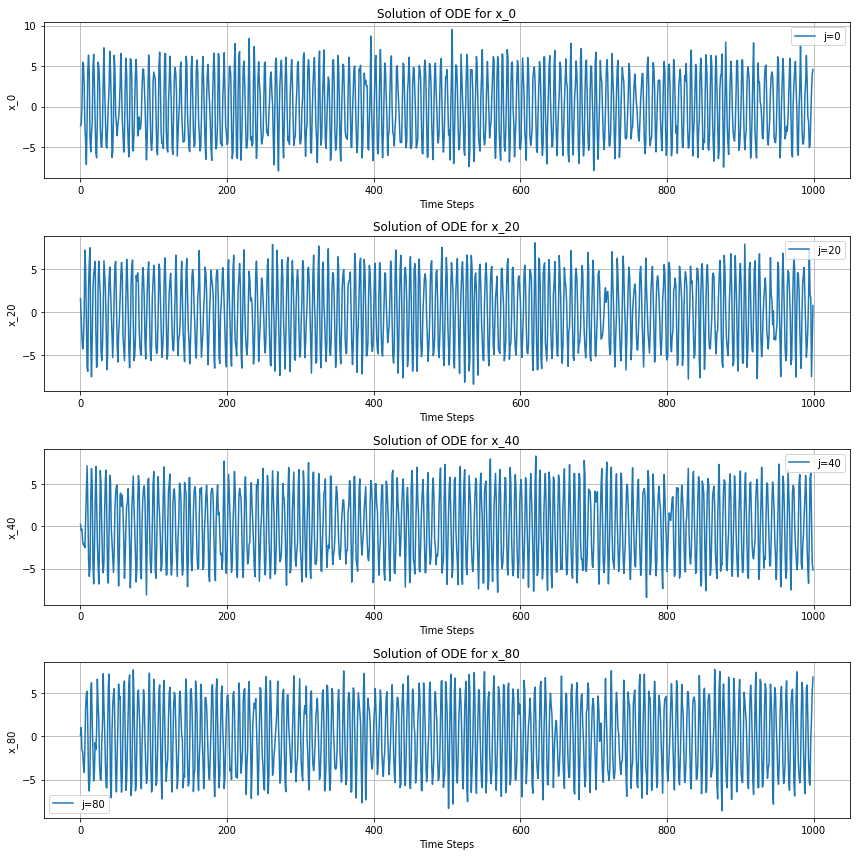

In [154]:
fig, axes = plt.subplots(len(j), 1, figsize=(12, len(j)*3))

for i in range(len(j)):
    axes[i].plot(x_values[:,j[i]], label=f'j={j[i]}')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(f'x_{j[i]}')
    axes[i].set_title(f'Solution of ODE for x_{j[i]}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()

In [8]:
x0 = 0.5 
y0 = 0.5

num_steps = 200
# x_values = np.zeros((num_steps, 90))
# y_values = np.zeros((num_steps, 90))
C = np.random.rand(90, 90) 

x = np.zeros(90)
y = np.zeros(90)

ans = np.dot(C, (x - x[:, None]))
ans.shape

(90, 90)

In [9]:
(x - x[:, None]).shape

(90, 90)

In [11]:
x[:, None].shape

(90, 1)